In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array




##Data Preparation

Cloning the dataset from the repository on GitHub.

In [4]:
!git clone https://github.com/nishant-1306/male-female-face-dataset.git

Cloning into 'male-female-face-dataset'...
remote: Enumerating objects: 58657, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 58657 (delta 0), reused 0 (delta 0), pack-reused 58656 (from 1)
Receiving objects: 100% (58657/58657), 261.44 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (58659/58659), done.


In [17]:
epochs = 10
lr = 1e-3
batch_size = 128
img_height = 224
img_width = 224
data = []
labels = []

##Image Data Generator

In [18]:
train_data = ImageDataGenerator(horizontal_flip=True,
                                width_shift_range=0.4,
                                height_shift_range=0.4,
                                zoom_range=0.3,
                                rotation_range=20,
                                rescale=1/255)


In [19]:
test_data = ImageDataGenerator(rescale=1/255)

In [20]:
target_size = (img_height, img_width)

Generating training and testing dataset.

In [21]:
train_generator = train_data.flow_from_directory(directory = '/content/male-female-face-dataset/Training',
                               target_size=target_size,
                               batch_size=batch_size,
                               class_mode='binary')

Found 47009 images belonging to 2 classes.


In [22]:
validation_generator = test_data.flow_from_directory(directory = '/content/male-female-face-dataset/Validation',
                                                     target_size=target_size,
                                                     batch_size=batch_size,
                                                     class_mode='binary')

Found 11649 images belonging to 2 classes.


In [24]:
train_generator.class_indices

{'female': 0, 'male': 1}

Getting a matrix/batch of RGB values of images.

In [25]:
x = next(train_generator)
x[0]

array([[[[0.12353231, 0.09215976, 0.08039506],
         [0.12420052, 0.09282796, 0.08106326],
         [0.12486872, 0.09349617, 0.08173146],
         ...,
         [0.6661718 , 0.5171522 , 0.42695606],
         [0.6653159 , 0.5162963 , 0.4261002 ],
         [0.66665226, 0.51763266, 0.42743662]],

        [[0.1254902 , 0.09411766, 0.08235294],
         [0.1254902 , 0.09411766, 0.08235294],
         [0.12552145, 0.0941489 , 0.08238419],
         ...,
         [0.6737135 , 0.5246939 , 0.43449783],
         [0.67058825, 0.52156866, 0.43137258],
         [0.67058825, 0.52156866, 0.43137258]],

        [[0.12875934, 0.09738678, 0.08562208],
         [0.12941177, 0.09803922, 0.08627451],
         [0.12941177, 0.09803922, 0.08627451],
         ...,
         [0.6776046 , 0.528585  , 0.4383889 ],
         [0.67058825, 0.52156866, 0.43137258],
         [0.67058825, 0.52156866, 0.43137258]],

        ...,

        [[0.9490197 , 0.9294118 , 0.9176471 ],
         [0.9490197 , 0.9294118 , 0.9176471 ]

##Building ML Model

In [26]:
model = Sequential()
model.add(InceptionV3(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation ='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

model.layers[0].trainable = False

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_191              │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_192              │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_193              │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,118,817 (107.26 MB)

 Trainable params: 6,305,793 (24.05 MB)

 Non-trainable params: 21,813,024 (83.21 MB)

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
model.fit(train_generator, steps_per_epoch=len(train_generator.filenames)//batch_size, epochs=20, validation_data=validation_generator, validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.8187 - loss: 0.5113 - val_accuracy: 0.9176 - val_loss: 0.2105
Epoch 2/20
  1/367 ━━━━━━━━━━━━━━━━━━━━ 1:24 230ms/step - accuracy: 0.8906 - loss: 0.2378

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8906 - loss: 0.2378 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.8707 - loss: 0.3119 - val_accuracy: 0.9105 - val_loss: 0.2262
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.8906 - loss: 0.2441 - val_accuracy: 1.0000 - val_loss: 0.1040
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.8723 - loss: 0.3028 - val_accuracy: 0.9219 - val_loss: 0.2000
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 98us/step - accuracy: 0.9141 - loss: 0.2211 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.8795 - loss: 0.2930 - val_accuracy: 0.9174 - val_loss: 0.2162
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 98us/step - accuracy: 0.8438 - loss: 0.4038 - val_accuracy: 1.0000 - val_loss: 0.2976
Epoch 9/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.8812 - loss: 0.2832 - val_accuracy: 0.924

#Test Model

In [57]:
#img_path = '/content/male-female-face-dataset/Validation/female/112959.jpg.jpg'

In [58]:
#img = load_img(img_path, target_size = (img_height, img_width, 3))
#plt.imshow(img)

In [59]:
#img = img_to_array(img)
#img = img/255

In [60]:
#img = img.reshape(1, img_height, img_width, 3)

In [61]:
#model.predict(img)

Defining the function to first take the image path as input and then process it convert it into its RGB matrix and then predict the probability of the image to be male and female.

In [82]:
def get_gender():
  img_path_2 = input("Enter the Image Path :")
  img_2 = load_img(img_path_2, target_size = (img_height, img_width, 3))
  plt.imshow(img_2)
  img_2 = img_to_array(img_2)
  img_2 = img_2/255
  img_2 = img_2.reshape(1, img_height, img_width, 3)
  prob = model.predict(img_2)[0][0]
  if prob < 0.5:
    return 'Female', (1-prob)*100
  else:
    return 'Male', prob*100

Enter the Image Path :/content/male-female-face-dataset/Validation/male/063429.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


('Male', 71.67447209358215)

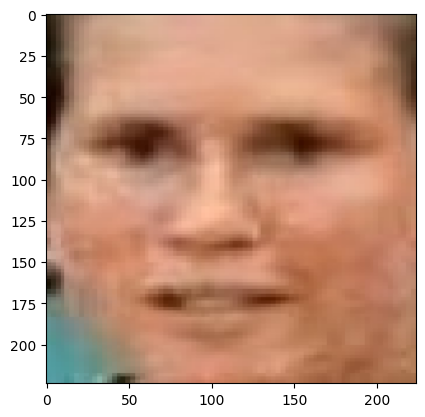

In [84]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/112950.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 99.91112318239175)

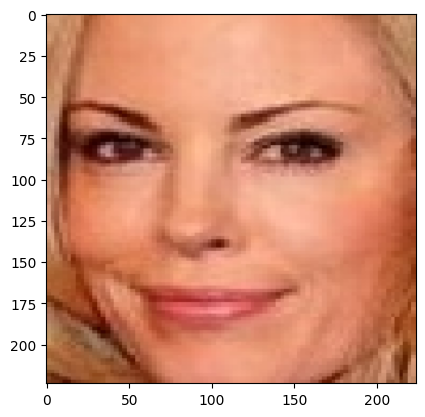

In [86]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113037.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 85.96460372209549)

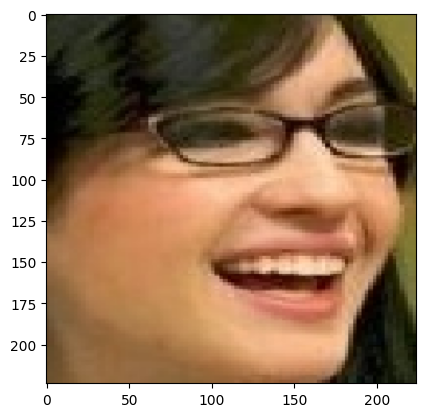

In [87]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113153.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 99.72080618608743)

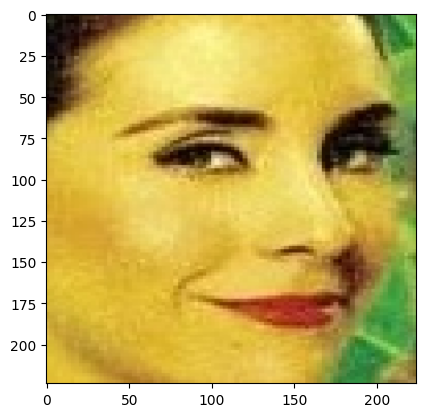

In [88]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113229.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 99.82851992826909)

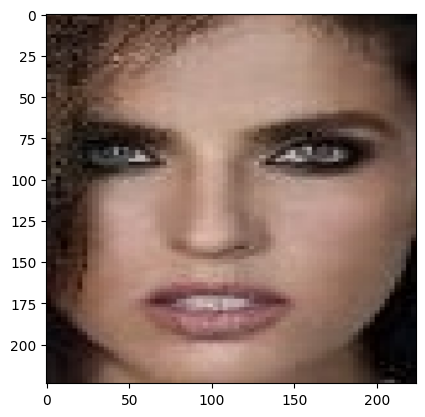

In [89]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113241.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 99.13699086755514)

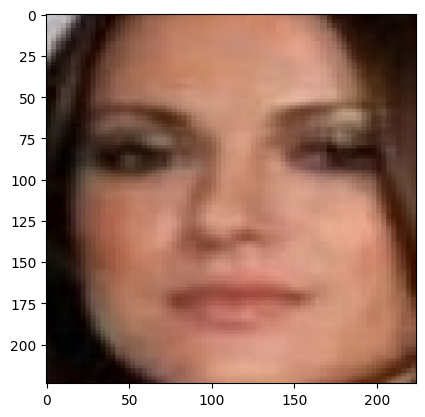

In [90]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113283.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Female', 95.66493406891823)

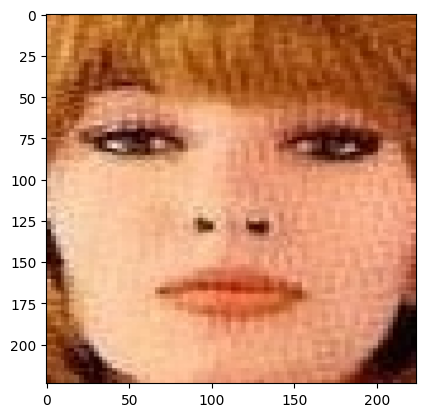

In [91]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/113322.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


('Female', 99.4752386584878)

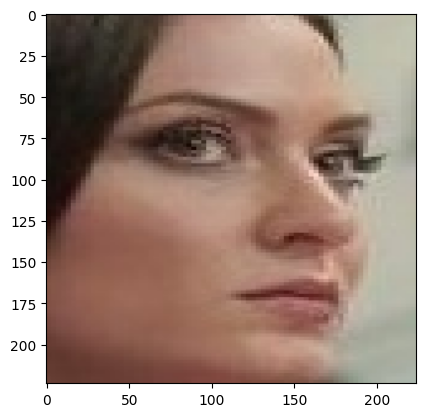

In [92]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/115413.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


('Female', 94.70463246107101)

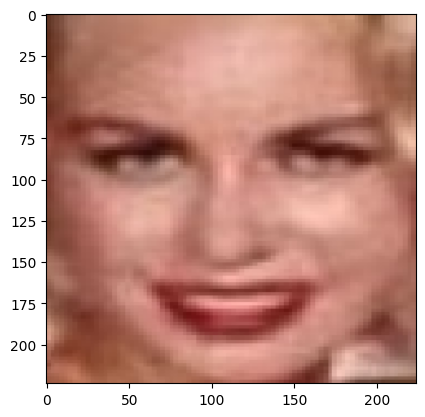

In [93]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/064166.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Male', 91.29548668861389)

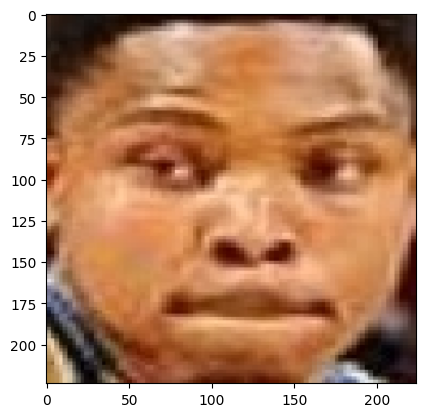

In [94]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/064614.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


('Male', 92.23280549049377)

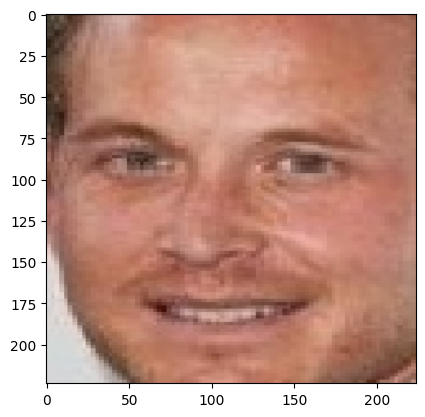

In [95]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/065769.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


('Male', 96.04183435440063)

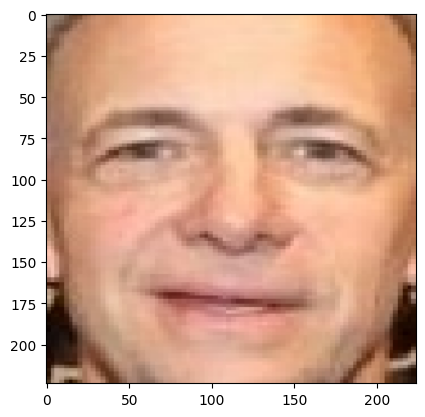

In [96]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/066207.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


('Male', 91.81358814239502)

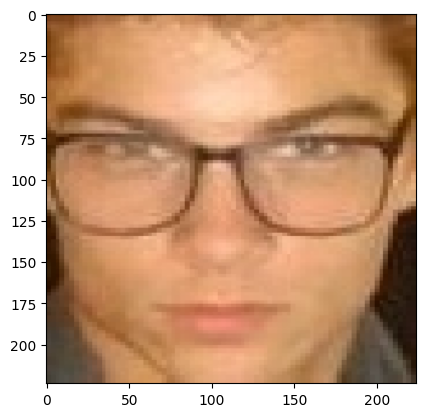

In [97]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/066345.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


('Male', 97.91739583015442)

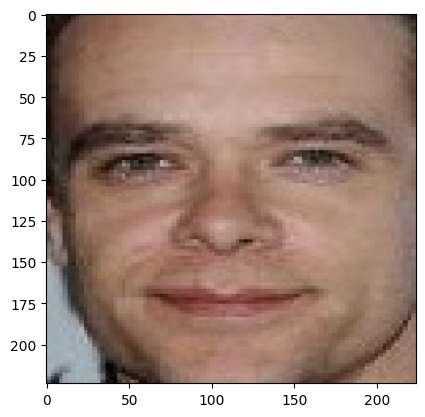

In [99]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/066820.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


('Male', 99.92614388465881)

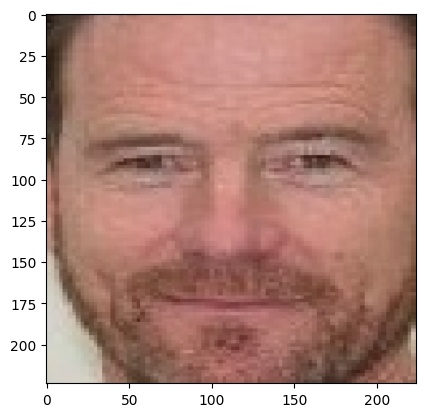

In [100]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/067320.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


('Male', 71.16622924804688)

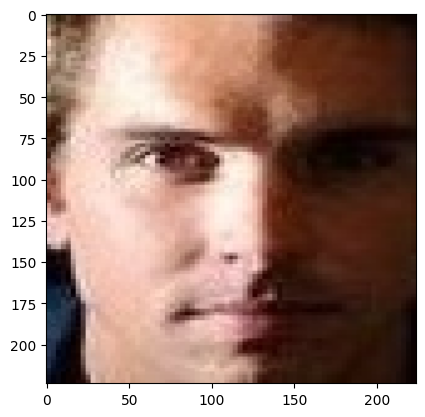

In [101]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/male/063636.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


('Male', 79.85788583755493)

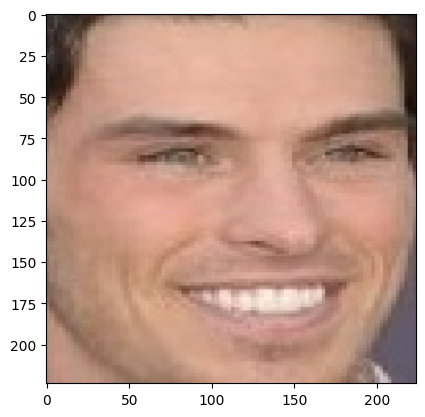

In [102]:
get_gender()

Enter the Image Path :/content/male-female-face-dataset/Validation/female/114528.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


('Female', 90.880286693573)

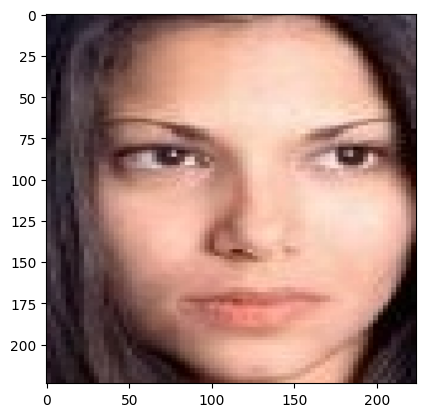

In [103]:
get_gender()

#Live Prediction

In [104]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [105]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


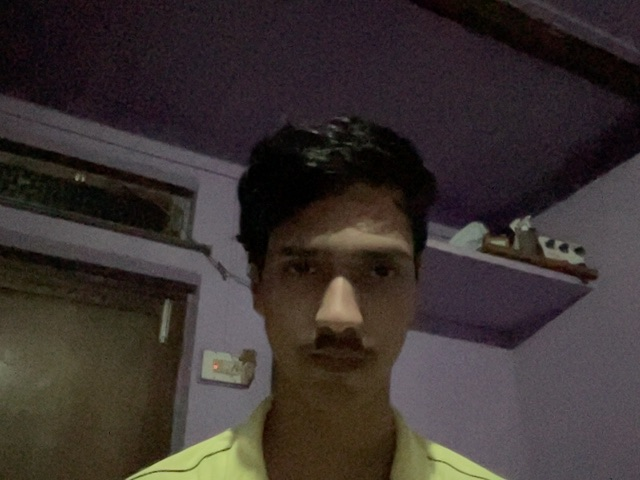

In [110]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  #show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Enter the Image Path :/content/photo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


('Male', 89.79900479316711)

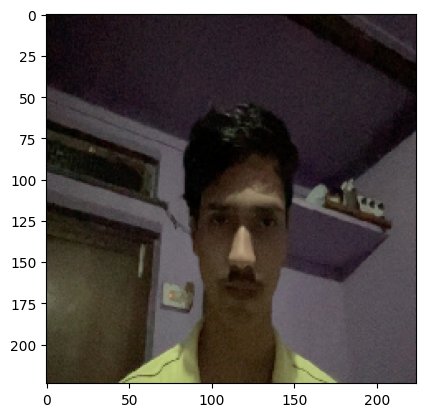

In [111]:
get_gender()